In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing


<AxesSubplot:>

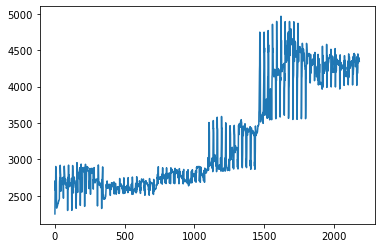

In [3]:
gold = pd.read_csv("E:DATA SETS/Gold_data.csv")
gold.price.plot()

In [4]:
gold

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [5]:
gold['date'] = pd.to_datetime(gold['date'])

In [6]:
13*12+3

159

In [72]:

# scikit-learn k-fold cross-validation
from numpy import array
from sklearn.model_selection import TimeSeriesSplit
# data sample
X = gold.date
y = gold.price
# prepare cross validation
kfold = TimeSeriesSplit(n_splits=10)
# enumerate splits


In [73]:
for i, (train_index, valid_index) in enumerate(kfold.split(X)):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

In [80]:
# evaluate a logistic regression model using repeated k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [88]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)

In [89]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [90]:
model = LogisticRegression()

In [92]:

scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [93]:
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.867 (0.031)


# Splitting data

In [7]:
# Random data cant be taken as sequence is the most important thing in time series analysis
Train = gold.head(1500)
Test = gold.tail(850)


# Moving Average 

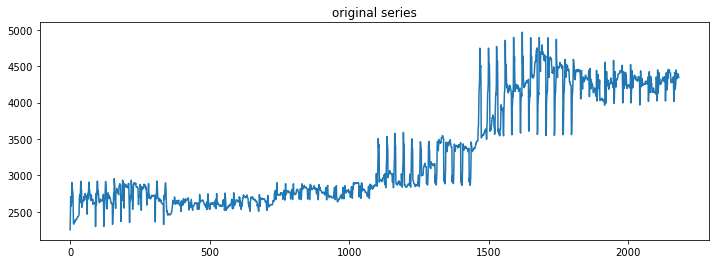

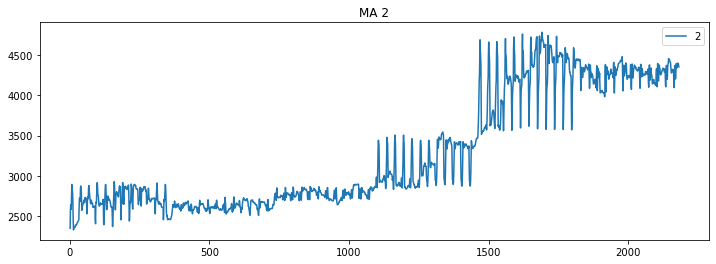

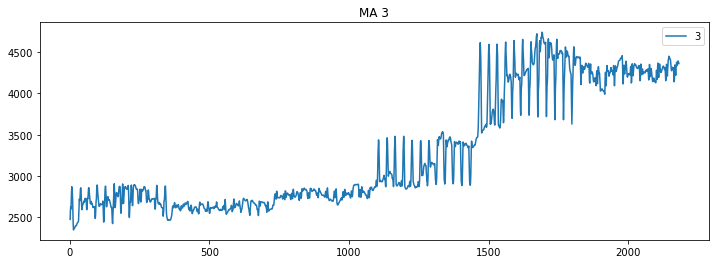

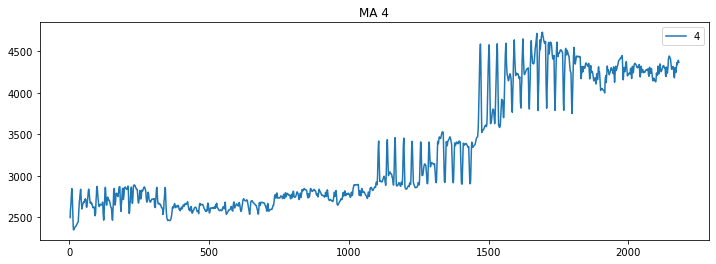

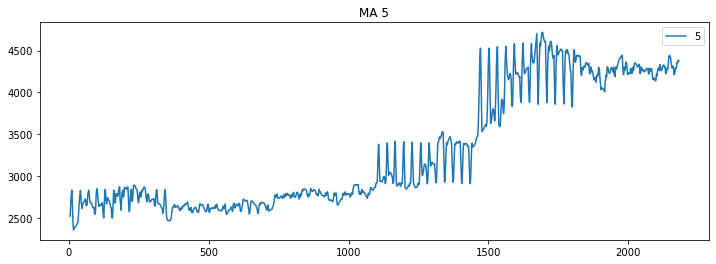

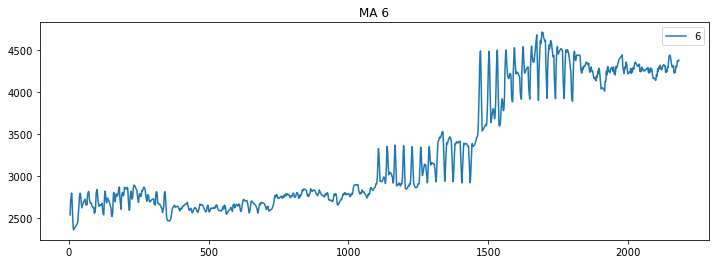

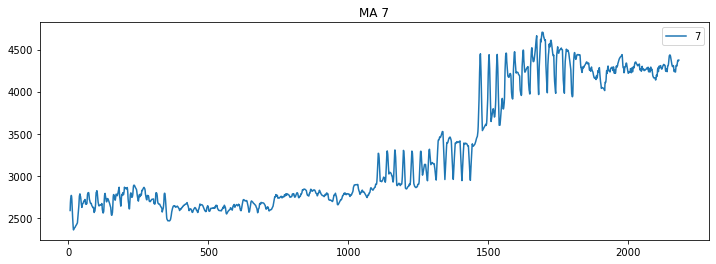

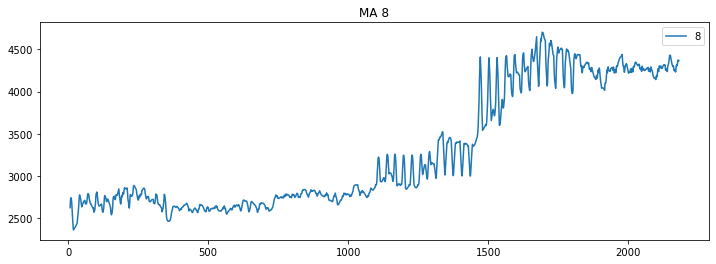

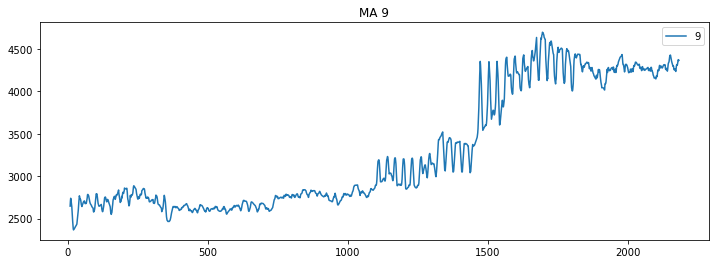

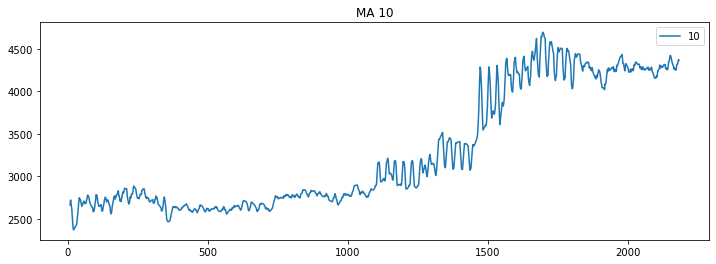

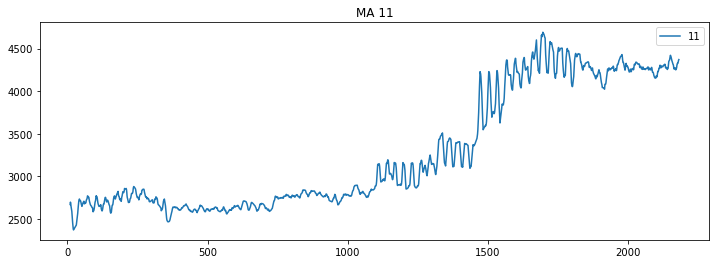

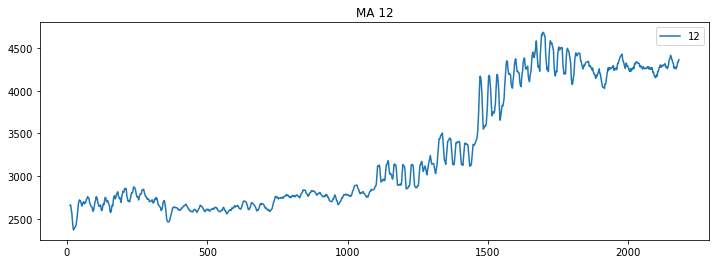

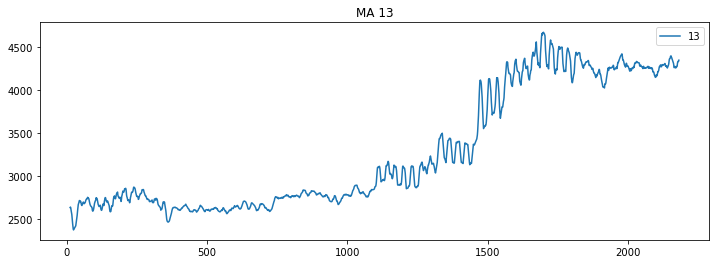

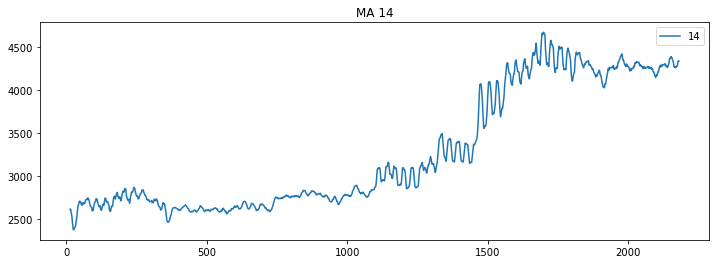

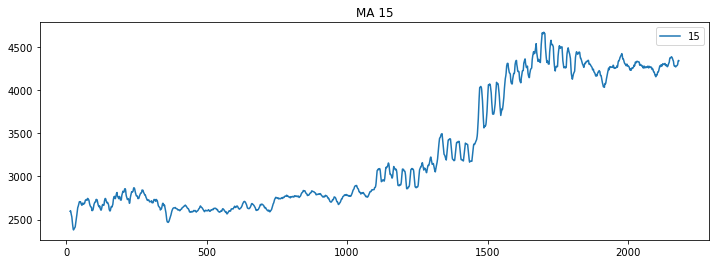

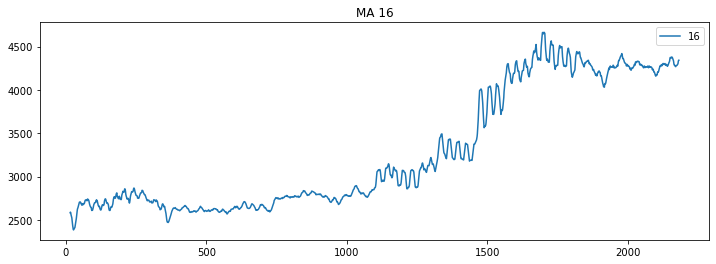

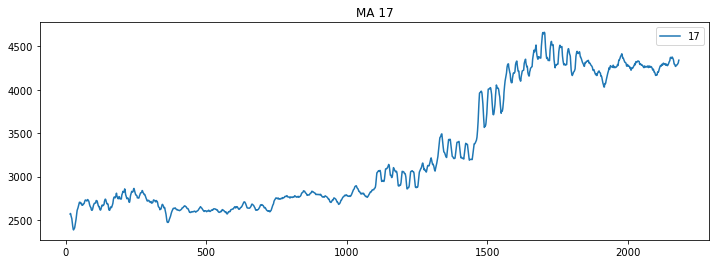

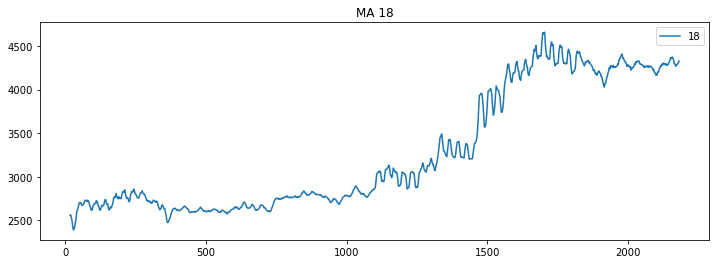

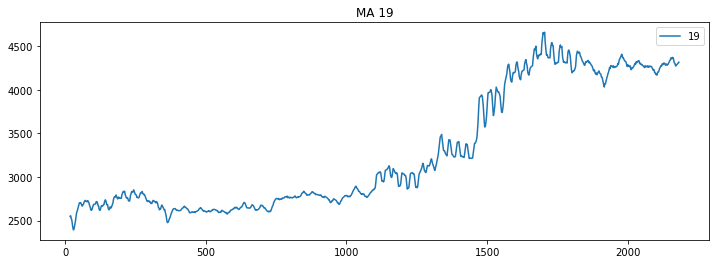

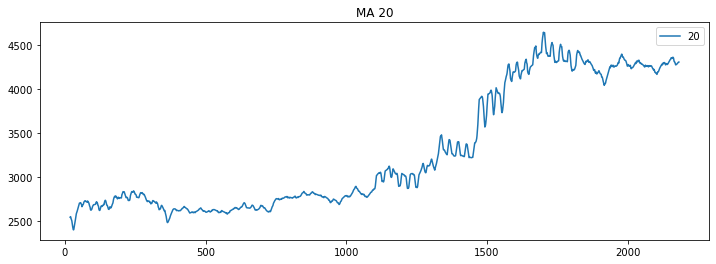

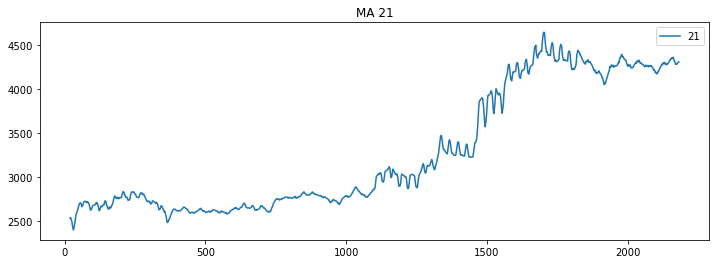

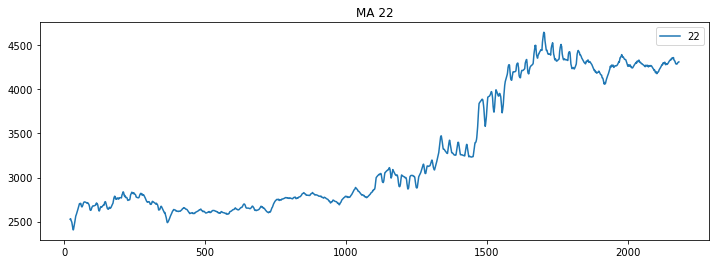

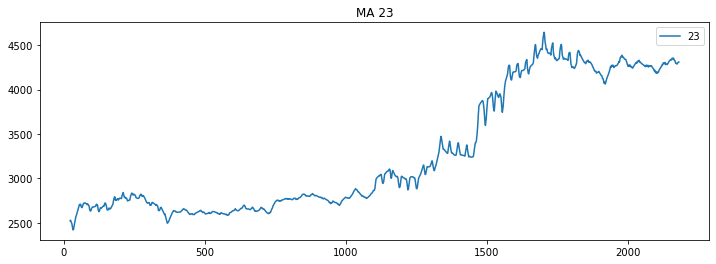

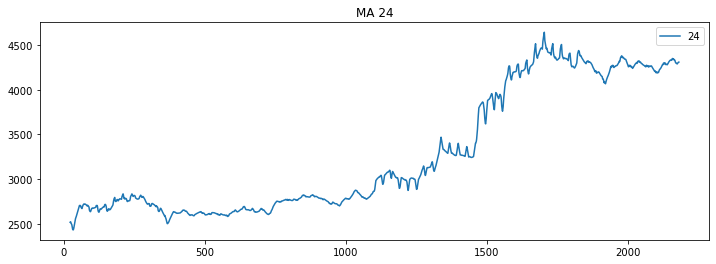

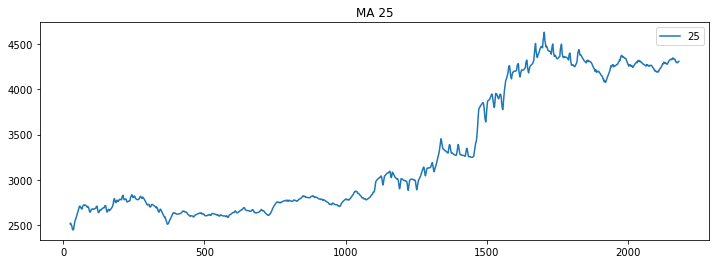

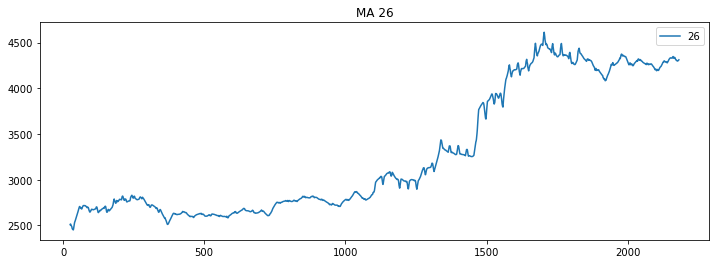

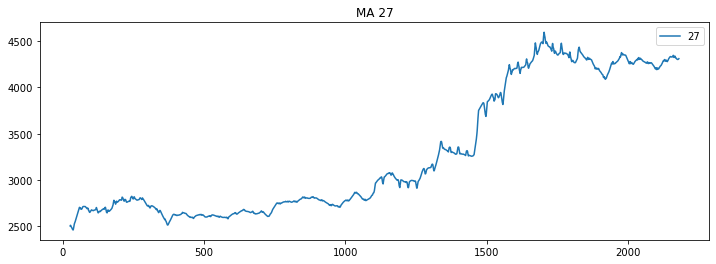

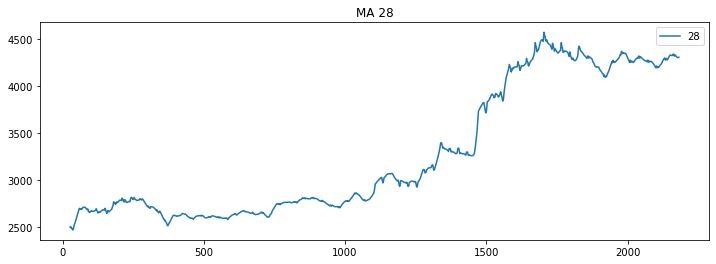

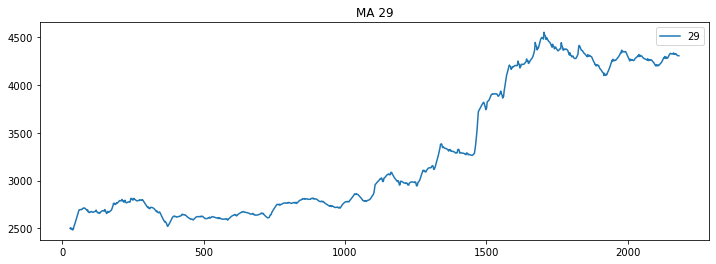

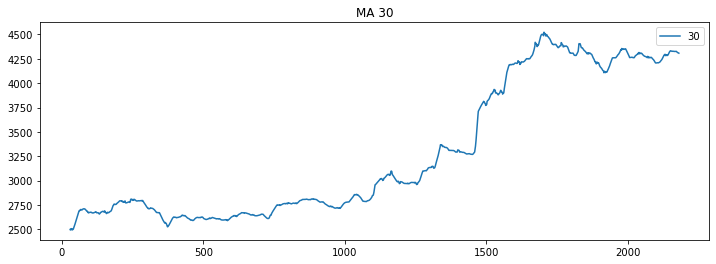

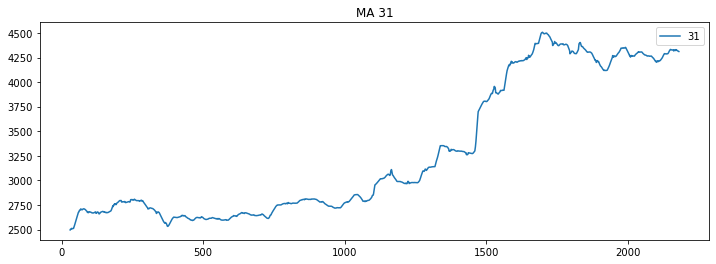

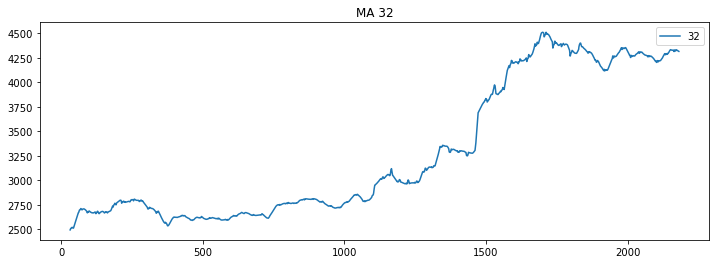

In [8]:
plt.figure(figsize=(12,4))
gold.price.plot(label="org")
plt.title("original series")

for i in range(2,33):
    plt.figure(figsize=(12,4))


    gold["price"].rolling(i).mean().plot(label=str(i))
    plt.title("MA "+str(i))
    plt.legend(loc='best')
    plt.show()

# Time series decomposition plot 


C:\Users\Win-10\AppData\Local\Temp/ipykernel_11836/988317866.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_ts_add = seasonal_decompose(gold.price,freq=30)


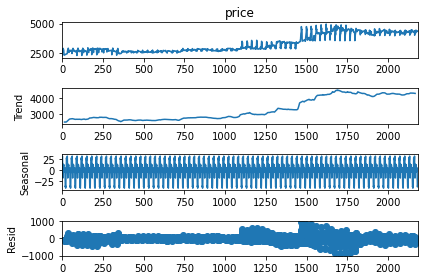

In [9]:
decompose_ts_add = seasonal_decompose(gold.price,freq=30)
decompose_ts_add.plot()
plt.show()

# ACF plots and PACF plots


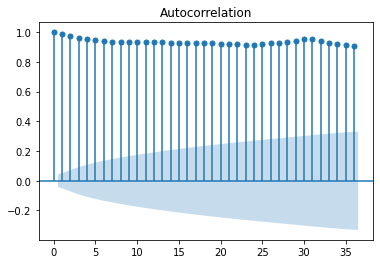

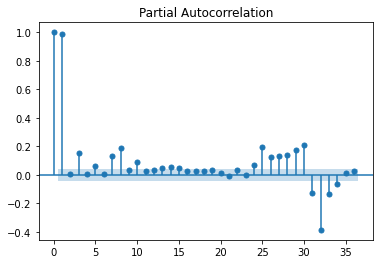

In [10]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(gold.price,lags=36)
tsa_plots.plot_pacf(gold.price,lags=36)
plt.show()

### Evaluation Metric MAPE

In [11]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [12]:
y=1000
y_pred=999

y=3
y_pred=2


In [13]:
#(y-y_pred)^2

#|(y-pred)/(y)|

In [14]:
Test.index[-1]

2181

In [15]:
Test.index[0]

1332

### Simple Exponential Method


In [16]:
ses_model = SimpleExpSmoothing(Train["price"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.price) 


C:\Users\Win-10\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


5.508015049823773

In [17]:
pred_ses

1332    3464.981248
1333    3475.684999
1334    3484.687999
1335    3496.150399
1336    3506.300319
           ...     
2177    4100.103571
2178    4100.103571
2179    4100.103571
2180    4100.103571
2181    4100.103571
Length: 850, dtype: float64

In [18]:
import numpy as np
x=np.arange(0.1,1,0.9/10)
for i in x :
    ses_model = SimpleExpSmoothing(Train["price"]).fit(smoothing_level=i)
    pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
    score=MAPE(pred_ses,Test.price) 
    print("smoothing_level ",i,"-->","MAPE Error",score)


smoothing_level  0.1 --> MAPE Error 8.361634323323772
smoothing_level  0.19 --> MAPE Error 5.73954088044069
smoothing_level  0.28 --> MAPE Error 4.211643890125051
smoothing_level  0.37 --> MAPE Error 4.114369404618935
smoothing_level  0.45999999999999996 --> MAPE Error 4.800683700545378
smoothing_level  0.5499999999999999 --> MAPE Error 5.658826004232278
smoothing_level  0.64 --> MAPE Error 6.530341284708571
smoothing_level  0.73 --> MAPE Error 7.375215516405691
smoothing_level  0.82 --> MAPE Error 8.208322332567784
smoothing_level  0.9099999999999999 --> MAPE Error 9.036119001700769


### Holt method 

In [19]:
# Holt method 
hw_model = Holt(Train["price"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.price) 

C:\Users\Win-10\AppData\Local\Temp/ipykernel_11836/1307250213.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train["price"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


955.4452358271556

In [20]:
pred_hw

1332      3532.856154
1333      3532.661662
1334      3532.468897
1335      3550.995321
1336      3557.965354
            ...      
2177    104991.291521
2178    105139.263050
2179    105287.234579
2180    105435.206108
2181    105583.177637
Length: 850, dtype: float64

In [21]:
import numpy as np
alphas=np.arange(0.1,1,0.9/10)
betas=np.arange(0.1,1,0.9/10)

for i in alphas :
    for j in betas:
        hw_model = Holt(Train["price"]).fit(smoothing_level=i, smoothing_slope=j)
        pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
        score=MAPE(pred_hw,Test.price)
        print("smoothing_level ",i," smoothing_slope",j,"-->","MAPE Error",score)


C:\Users\Win-10\AppData\Local\Temp/ipykernel_11836/3652847986.py:7: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train["price"]).fit(smoothing_level=i, smoothing_slope=j)


smoothing_level  0.1  smoothing_slope 0.1 --> MAPE Error 66.17545626478346
smoothing_level  0.1  smoothing_slope 0.19 --> MAPE Error 286.0270262769379
smoothing_level  0.1  smoothing_slope 0.28 --> MAPE Error 646.5110915908872
smoothing_level  0.1  smoothing_slope 0.37 --> MAPE Error 928.4396813263496
smoothing_level  0.1  smoothing_slope 0.45999999999999996 --> MAPE Error 1078.3415018763912
smoothing_level  0.1  smoothing_slope 0.5499999999999999 --> MAPE Error 1016.4625569470322
smoothing_level  0.1  smoothing_slope 0.64 --> MAPE Error 787.8676147733856
smoothing_level  0.1  smoothing_slope 0.73 --> MAPE Error 563.5604749680417
smoothing_level  0.1  smoothing_slope 0.82 --> MAPE Error 464.1727084206674
smoothing_level  0.1  smoothing_slope 0.9099999999999999 --> MAPE Error 527.3789471332889
smoothing_level  0.19  smoothing_slope 0.1 --> MAPE Error 255.79375406499852
smoothing_level  0.19  smoothing_slope 0.19 --> MAPE Error 592.6874573601723
smoothing_level  0.19  smoothing_slope 0.2

# Triple Exponential

### Holts winter exponential smoothing with additive seasonality and additive trend


In [22]:
hwe_model_add_add = ExponentialSmoothing(Train["price"],seasonal="add",trend="add",seasonal_periods=30).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.price) 

C:\Users\Win-10\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


30.87470063019305

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [23]:
hwe_model_mul_add = ExponentialSmoothing(Train["price"],seasonal="mul",trend="add",seasonal_periods=30).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.price)

C:\Users\Win-10\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


25.70685209889311

## Final Model by combining train and test

In [24]:
hwe_model_add_add = ExponentialSmoothing(gold["price"],seasonal="mul",trend="add",seasonal_periods=30).fit()

C:\Users\Win-10\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [25]:
#Forecasting for next 30 time periods
hwe_model_add_add.forecast(30)

2182    4328.231488
2183    4326.667681
2184    4367.942223
2185    4379.513994
2186    4398.011690
2187    4458.774789
2188    4439.467363
2189    4417.278631
2190    4456.477549
2191    4518.857804
2192    4569.125905
2193    4559.057974
2194    4581.184501
2195    4600.145937
2196    4642.247019
2197    4687.202331
2198    4739.311011
2199    4774.608343
2200    4816.696576
2201    4817.519408
2202    4769.731473
2203    4745.577058
2204    4683.587480
2205    4636.002260
2206    4603.729876
2207    4575.167106
2208    4555.988816
2209    4522.695370
2210    4482.487284
2211    4478.260096
dtype: float64

<AxesSubplot:>

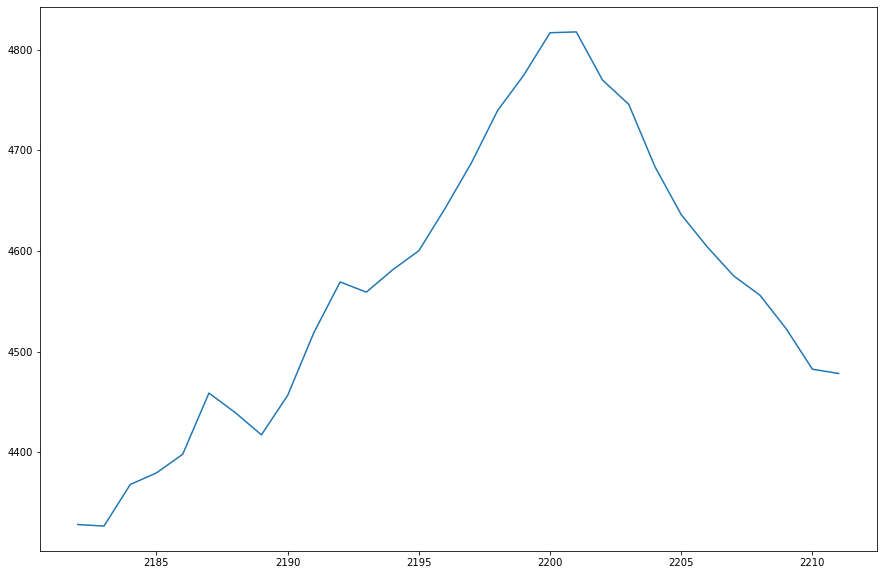

In [26]:

plt.figure(figsize=(15,10))
sns.lineplot(data = hwe_model_add_add.forecast(30))

In [1]:
#THE END